In [96]:
#Traemos las librerias para el modelo KNN y Kmeans como tambien para ADELINE y MADELINE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import seaborn as sns


In [162]:
#Traemos la base de datos
from google.colab import drive
drive.mount('/content/drive')

nxl="/content/drive/MyDrive/Colab Notebooks/Analitica de negocios /Estudio_Mercado_A.N.xlsx"
XDB=pd.read_excel(nxl,sheet_name=1)
XDB=XDB[["ID", "EDAD","GENERO_SCORE", "OCUPACIÓN_SCORE", "INGRESO MENSUAL", "ESTRATO", "GASTO SIGNIFICATIVO_SCORE", "SOLICITUD CREDITO_SCORE"]]
XDB=XDB.dropna()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
#Se cargan los datos en bruto
XD=np.array(XDB[["ID", "EDAD","GENERO_SCORE", "OCUPACIÓN_SCORE", "INGRESO MENSUAL", "ESTRATO", "GASTO SIGNIFICATIVO_SCORE"]])
yd=np.array(XDB[["SOLICITUD CREDITO_SCORE"]])

1. Coorelacion de las variables

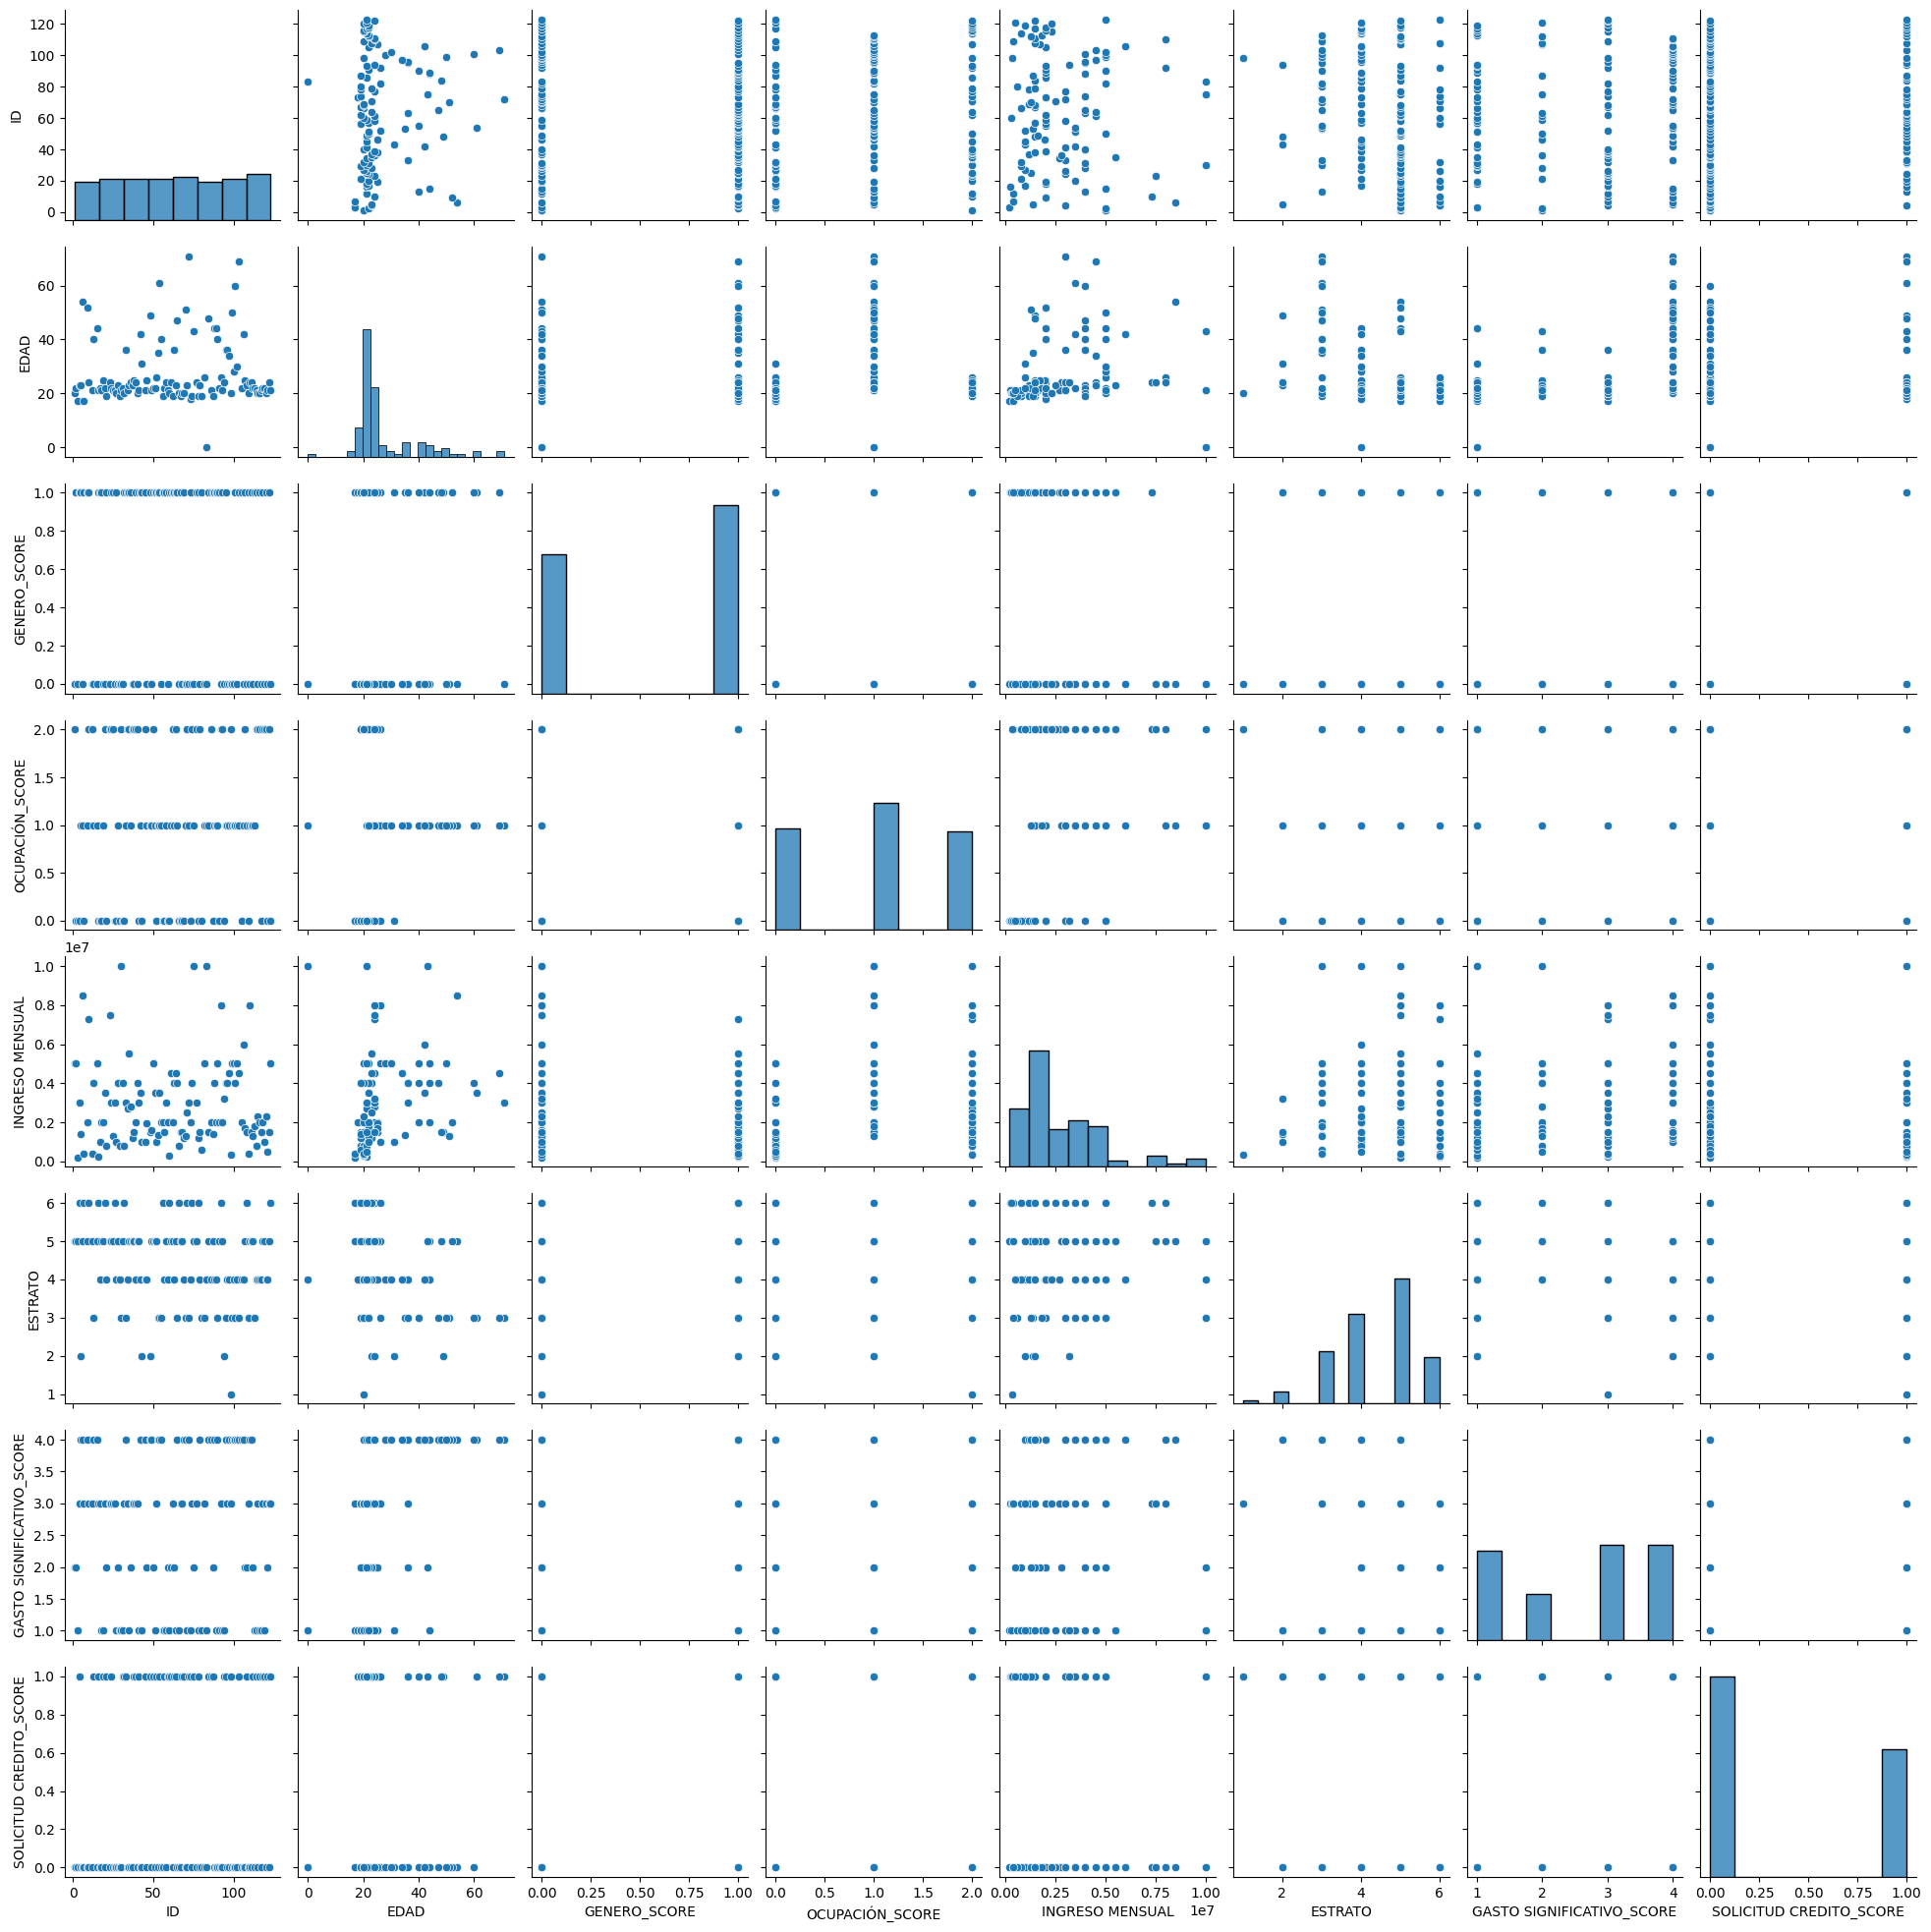

                                 ID      EDAD  GENERO_SCORE  OCUPACIÓN_SCORE  \
ID                         1.000000  0.054885     -0.049793         0.097135   
EDAD                       0.054885  1.000000      0.006934         0.043562   
GENERO_SCORE              -0.049793  0.006934      1.000000        -0.101381   
OCUPACIÓN_SCORE            0.097135  0.043562     -0.101381         1.000000   
INGRESO MENSUAL           -0.020643  0.216548     -0.289773         0.259436   
ESTRATO                   -0.203313 -0.387134     -0.040864         0.004278   
GASTO SIGNIFICATIVO_SCORE  0.018101  0.519998     -0.047605         0.199173   
SOLICITUD CREDITO_SCORE    0.081457  0.030503      0.135490        -0.130317   

                           INGRESO MENSUAL   ESTRATO  \
ID                               -0.020643 -0.203313   
EDAD                              0.216548 -0.387134   
GENERO_SCORE                     -0.289773 -0.040864   
OCUPACIÓN_SCORE                   0.259436  0.004278   

In [99]:
#Coeficiente de correlación

#Se procede con la grafica de correlación
sns.pairplot(XDB)
plt.show()
#Procede a determinar las correlaciones
print(XDB.corr())


2. Modeo de agrupamiento Knn y Kmeans

In [100]:
#MODELO KNN

mknn=KNeighborsClassifier()
mknn.fit(XD,yd)
ydp=mknn.predict(XD)

print("la precisión en el pronóstico es:",metrics.accuracy_score(yd,ydp))



la precisión en el pronóstico es: 0.7345132743362832


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


El solicitante de crédito pertenece al grupo [0]


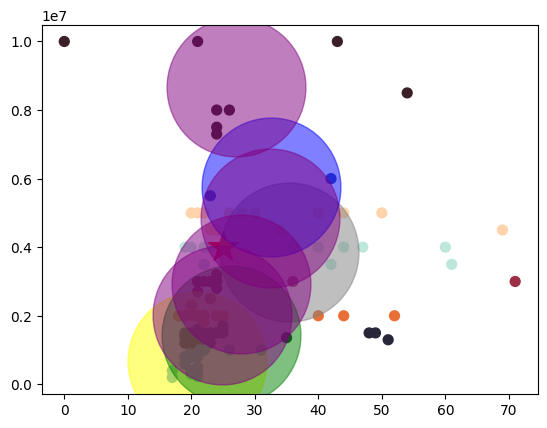

La conformación de los centroides es:
 [[5.74000000e+01 3.53333333e+01 5.33333333e-01 1.13333333e+00
  3.86666667e+06 4.20000000e+00 3.06666667e+00]
 [5.35500000e+01 2.08500000e+01 6.50000000e-01 5.00000000e-01
  6.69000000e+05 4.35000000e+00 2.05000000e+00]
 [7.05000000e+01 3.25000000e+01 5.00000000e-01 1.50000000e+00
  5.75000000e+06 4.50000000e+00 2.50000000e+00]
 [7.23181818e+01 2.62272727e+01 5.90909091e-01 9.54545455e-01
  1.43000000e+06 4.45454545e+00 2.95454545e+00]
 [5.36250000e+01 2.70000000e+01 1.25000000e-01 1.50000000e+00
  8.66250000e+06 4.87500000e+00 2.62500000e+00]
 [4.75000000e+01 2.78333333e+01 6.66666667e-01 1.00000000e+00
  2.93333333e+06 4.58333333e+00 2.41666667e+00]
 [7.41000000e+01 2.49000000e+01 7.50000000e-01 1.10000000e+00
  2.01750000e+06 4.35000000e+00 2.20000000e+00]
 [7.06428571e+01 3.23571429e+01 4.28571429e-01 1.07142857e+00
  4.85714286e+06 4.28571429e+00 3.07142857e+00]]


array([ 133411.93333333, 3331078.05      , 1750063.        ,
       2570055.04545455, 4662574.25      , 1066748.83333333,
       1982552.8       ,  857205.28571428])

In [101]:
np.random.seed(42)

#Creame cinco grupos de datos - Clusters
k=8
mkm=KMeans(n_clusters=k,init="random",random_state=42)
mkm.fit(XD,yd)

labels=mkm.labels_
centroids=mkm.cluster_centers_
#Valor de un s
XDi=np.array([(124,25,0,2,4000000,4,3)])
ydk=mkm.predict(XDi)

print("El solicitante de crédito pertenece al grupo",ydk)

plt.scatter(XD[:,1],XD[:,4],c=labels,s=50,cmap="icefire")
plt.scatter(XDi[:,1],XDi[:,4],marker="*",s=500,facecolors="red")
plt.scatter(centroids[0,1],centroids[0,4],marker="o",alpha=0.5,s=10000,facecolors="grey")
plt.scatter(centroids[1,1],centroids[1,4],marker="o",alpha=0.5,s=10000,facecolors="yellow")
plt.scatter(centroids[2,1],centroids[2,4],marker="o",alpha=0.5,s=10000,facecolors="blue")
plt.scatter(centroids[3,1],centroids[3,4],marker="o",alpha=0.5,s=10000,facecolors="green")
plt.scatter(centroids[4,1],centroids[4,4],marker="o",alpha=0.5,s=10000,facecolors="purple")
plt.scatter(centroids[5,1],centroids[5,4],marker="o",alpha=0.5,s=10000,facecolors="purple")
plt.scatter(centroids[6,1],centroids[6,4],marker="o",alpha=0.5,s=10000,facecolors="purple")
plt.scatter(centroids[7,1],centroids[7,4],marker="o",alpha=0.5,s=10000,facecolors="purple")

plt.show()

print("La conformación de los centroides es:\n",centroids)

np.sum((np.abs(centroids-XDi)),axis=1)

In [106]:
counts_1=np.bincount(labels) #Cuantos datos conforman cada grupo
XDB["cluster"]=labels

counts_2=XDB.groupby("ESTRATO").agg({"SOLICITUD CREDITO_SCORE":lambda x: (x==0).sum()})
counts_3=XDB.groupby("ESTRATO").agg({"SOLICITUD CREDITO_SCORE":lambda x: (x==1).sum()})

df=pd.DataFrame(np.column_stack((counts_2,counts_3)))
df.columns=['Peticion','No Peticion']

print("Cantidad de solicitantes por estrato socioeconomico", df)

,Peticion,No Peticion
0,0,1
1,2,2
2,12,6
3,19,12
4,27,16
5,9,7


2. Modelo de pronostico

In [107]:
mnb=GaussianNB()
mnb.fit(XD,yd)

#Obtenemos los valores de las medias
u=mnb.theta_

#Se procede con el calculo de la desviación
sigma=np.sqrt(mnb.var_)

#Se procede a evaluar la información del profesor
XA=np.array([[125,35,1,1,7000000,5,4]])
VP=mnb.predict(XA)
print("La probabilidad de que solicite un credito es de: ", VP)

#Evaluamos el comportamiento del modelo
ymnb=mnb.predict(XD)
confusion_matrix(yd,ymnb)

#Cuantos solicitantes de crédito hay por categoría
ndc=mnb.class_count_
print("El numero de solicitantes y no solicitantes es de: ",ndc)

La probabilidad de que solicite un credito es de:  [0]
El numero de solicitantes y no solicitantes es de:  [69. 44.]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MADELINE

In [110]:
#Normalizamos
XDn=XD/np.max(XD,axis=0) #axis=0 busca el máximo por columnas
ydp=(yd-np.mean(yd))/np.std(yd)
ydp=1/(1+np.exp(-ydp))

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 0.0482
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0458
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0448
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0439
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0431
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0422
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0415
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0408
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0402
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0394
Epoch 12/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0390
Epoch 13/200
6/6 [==============================] - 0s 3ms/st

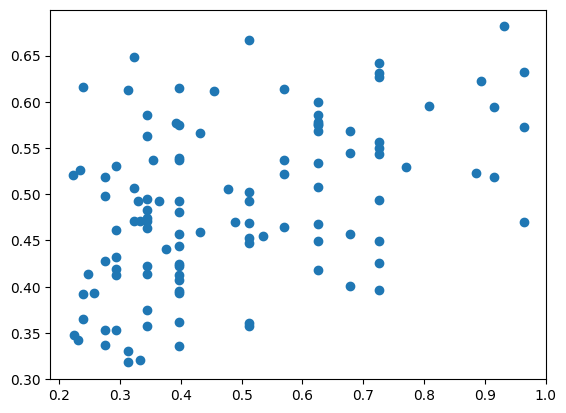

In [121]:
NE=7
model=Sequential()
model.add(Dense(10,activation="linear",use_bias=False,input_dim=NE))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="mse")
history=model.fit(XDn,ydp,epochs=200,batch_size=20)
ys=model.predict(XDn)


#Gráfico de Dispersión
plt.figure()
plt.scatter(ydp,ys)
plt.show()

In [127]:

#Matriz de Correlación
df2=pd.DataFrame(np.column_stack((ydp,ys)))
print("La correlación es:", df2.corr())

#Efectos Independientes
W2=model.layers[0].get_weights()[0]
C2=model.layers[1].get_weights()[0]
np.dot(W2,C2)

#Discrepanncia entre las medias del modelo
dscm=(np.mean(ydp)-np.mean(ys))/np.mean(ydp)
print("La discrepancia entre medias es de:", dscm*100)

#Discrepancia entre desviaciones
dscv=(np.std(ydp)-np.std(ys))/np.std(ydp)
print("La discrepancia entre dispersiones:", dscv*100)


La correlación es:           0         1
0  1.000000  0.456957
1  0.456957  1.000000
La discrepancia entre medias es de: -0.4633113947667574
La discrepancia entre dispersiones: INGRESO MENSUAL    55.426766
dtype: float64


In [152]:
XD2=np.array(XDB[["ID", "EDAD","GENERO_SCORE", "OCUPACIÓN_SCORE", "SOLICITUD CREDITO_SCORE", "ESTRATO", "GASTO SIGNIFICATIVO_SCORE"]])
yd2=np.array(XDB[["INGRESO MENSUAL"]])

In [161]:
#Cual es la probabilidad para este soliticitante de credito
XDi=np.array([[126,19,0,0,1,4,3]])
XDin=XDi/np.max(XD2,axis=0)
ypi=model.predict(XDin)
print("El ingreso de la persona seria de:", ypi*10000000)


1/1 [==============================] - 0s 67ms/step
El ingreso de la persona seria de: [[3939953.44638824]]


In [184]:
#Pronostico
from google.colab import drive
drive.mount('/content/drive')
nxl="/content/drive/MyDrive/Colab Notebooks/Analitica de negocios /Estudio_Mercado_A.N.xlsx"
XDB1=pd.read_excel(nxl,sheet_name=2)

XDB1=XDB1[["ID", "EDAD", "GENERO_SCORE", "OCUPACIÓN_SCORE",  "ESTRATO", "GASTO SIGNIFICATIVO_SCORE", "SOLICITUD CREDITO_SCORE"]]
XDB1=XDB1.dropna()

XD1=np.array(XDB1[["ID", "EDAD","GENERO_SCORE", "OCUPACIÓN_SCORE", "SOLICITUD CREDITO_SCORE", "ESTRATO", "GASTO SIGNIFICATIVO_SCORE"]])
XD1n=XD1/np.max(XD1,axis=0)

p=model.predict(XD1n)

print("Los ingresos pronosticados de las 10 personas faltantes son de: ", p*10000000)

infx=pd.DataFrame(np.column_stack((XD1,p)))
infx.to_excel('InformePronostico.xlsx')